<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> Exercise no. 7 </b></p>
</div>

In [6]:
import pandas as pd
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

In [17]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of students
num_students = 500

# Generate student IDs
student_ids = np.arange(10001, 10001 + num_students)

# Randomly assign students to Class 1 or Class 2
classes = np.random.choice(["Class 1", "Class 2"], size=num_students)

# Generate scores for Mathematics and English
# Class 1: Higher average in Math, lower in English
# Class 2: Lower average in Math, higher in English
math_scores = [
    np.random.normal(loc=80, scale=10) if cls == "Class 1" else np.random.normal(loc=70, scale=12)
    for cls in classes
]

english_scores = [
    np.random.normal(loc=70, scale=12) if cls == "Class 1" else np.random.normal(loc=80, scale=10)
    for cls in classes
]

# Create the DataFrame
df = pd.DataFrame({
    "Student ID": student_ids,
    "Class": classes,
    "Mathematics": np.clip(math_scores, 0, 100),  # Clamp scores between 0 and 100
    "English": np.clip(english_scores, 0, 100)
})



In [19]:
# Round the scores to the nearest integer
df["Mathematics"] = df["Mathematics"].round(0).astype(int)
df["English"] = df["English"].round(0).astype(int)

<Axes: xlabel='Class', ylabel='English'>

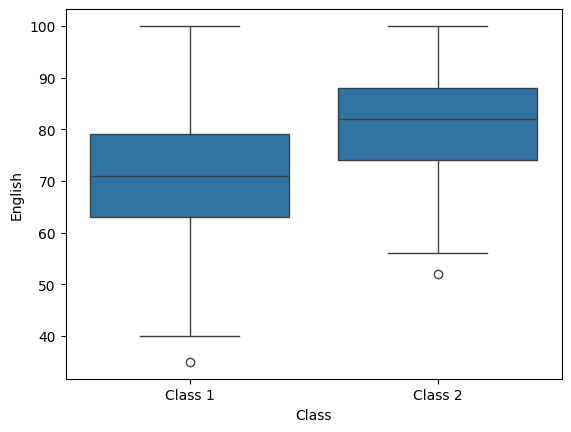

In [34]:
#sns.boxplot(data = df,y = 'Mathematics', hue= 'Class')
sns.boxplot(data = df,y = 'English', x= 'Class')

In [7]:
# Creating a first DataFrame with the relative distribution of scores in the center and an average of 75
np.random.seed(0)
num_students = 80
grades = np.random.randint(60, 90, num_students)  # grade range 60-89
student_ids = range(1, num_students + 1)
names = ['Student ' + str(i) for i in range(1, num_students + 1)]
df1 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

# Creating a second DataFrame with the distribution of scores at the edges and an average of 75
np.random.seed(1)
grades_low = np.random.randint(40, 60, num_students // 2)  # grade range  40-59
grades_high = np.random.randint(90, 100, num_students // 2)  # grade range  90-99
grades = np.concatenate((grades_low, grades_high))
random.shuffle(grades)  # shuffle grades
df2 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})



#### 1.1 Display side-by-side box plots for df1 and df2 depicting their distributions with appropriate titles for each graph.

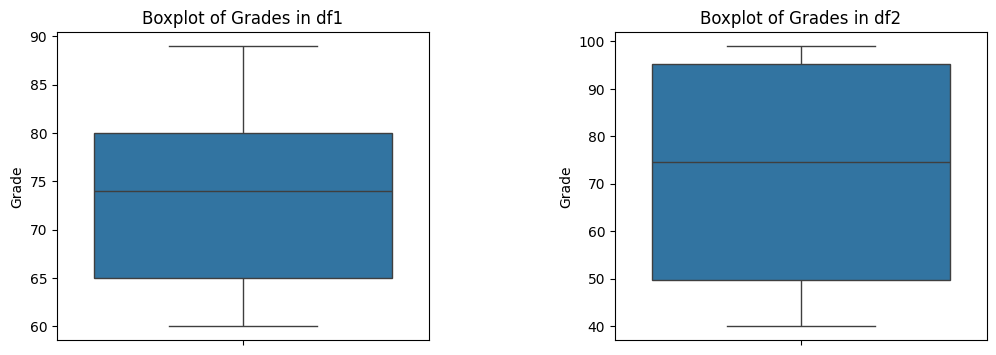

#### 1.2 Do the plots appear similar when placed next to each other? Suggest a better way to visualize the plots.

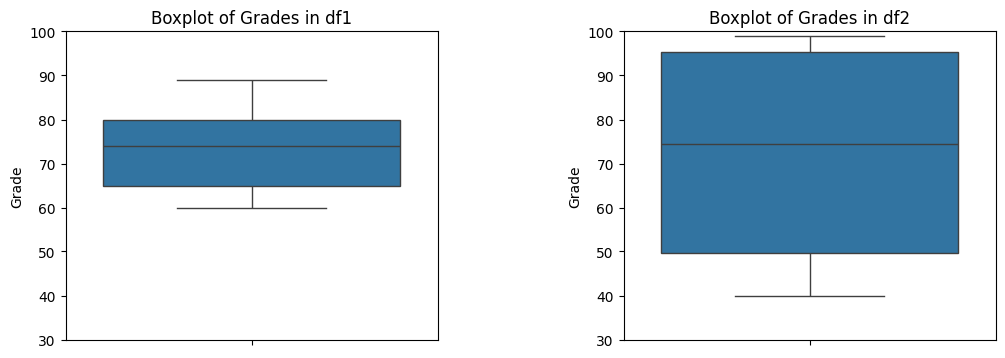

#### 1.3 Create a histogram that will be displayed next to each other, note that you can learn a lot from this histogram.

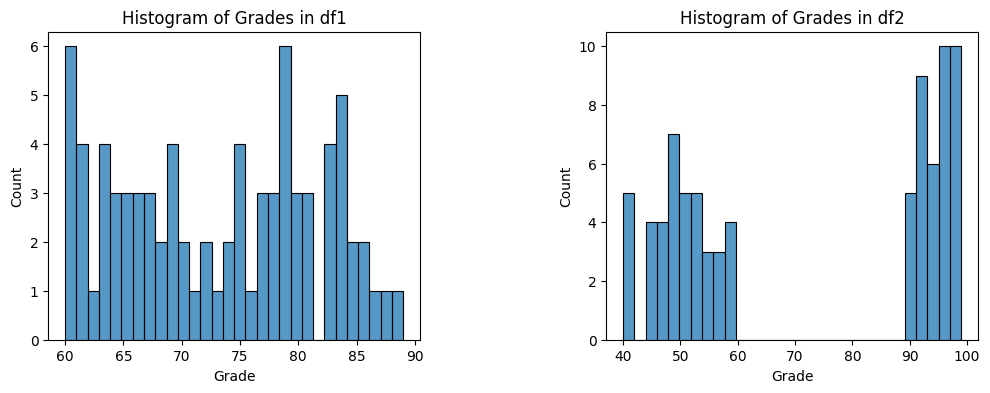

---
### Types of distributions.
##### Let's learn how to read the code and how it works.

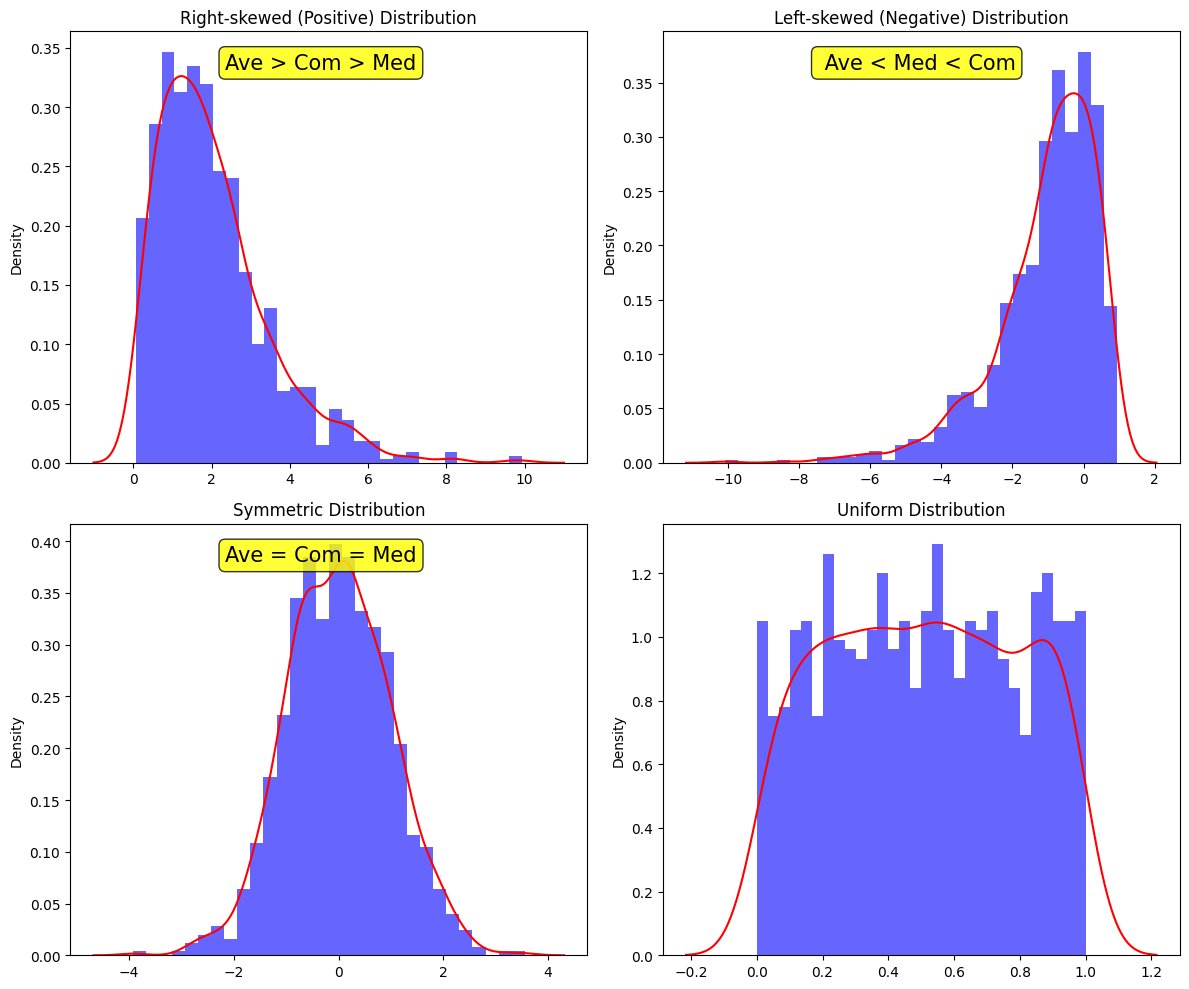

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create data for each distribution
data1 = np.random.gamma(2, 1, 1000)  # Right-skewed Distribution
data2 = (1- np.random.gamma(2, 1, 1000))  # Left-skewed Distribution
data3 = np.random.standard_normal(1000)  # Symmetric Distribution
data4 = np.random.uniform(0, 1, 1000)  # Uniform Distribution

# Titles for each subplot
titles = ["Right-skewed (Positive) Distribution", "Left-skewed (Negative) Distribution", "Symmetric Distribution", "Uniform Distribution"]

# Explanation text for each subplot
explanations = [
    "Ave > Com > Med",
    " Ave < Med < Com",
    "Ave = Com = Med",
    ""
]
# Data and KDE for each subplot
datasets = [data1, data2, data3, data4]

for i, ax in enumerate(axes.flat):
    ax.hist(datasets[i], bins=30, density=True, alpha=0.6, color='blue')
    sns.kdeplot(datasets[i], color='red', ax=ax)
    ax.set_title(titles[i])

    # Add explanation text
    ax.text(0.3, 0.95, explanations[i], transform=ax.transAxes, fontsize=15,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
    
# Adjust layout and display
plt.tight_layout()
plt.show()


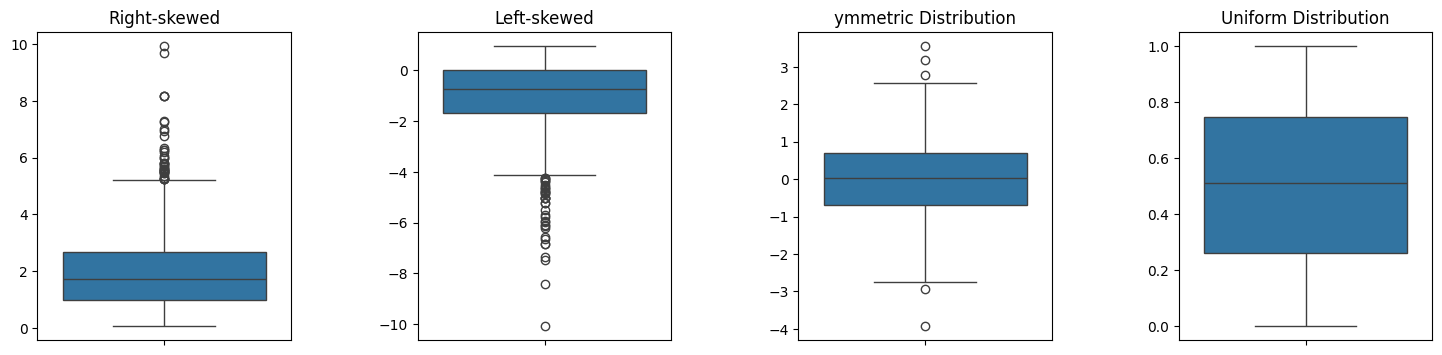

In [42]:
# Combine both DataFrames for plotting
fig, ax = plt.subplots(1,4, figsize = (18,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.boxplot(data = data1, ax = ax[0])
ax[0].set_title('Right-skewed')

sns.boxplot(data = data2, ax = ax[1])
ax[1].set_title('Left-skewed')

sns.boxplot(data = data3, ax = ax[2])
ax[2].set_title('ymmetric Distribution')

sns.boxplot(data = data4, ax = ax[3])
ax[3].set_title('Uniform Distribution')
#ax[0].set_ylim([30, 100])
#ax[1].set_ylim([30, 100])

plt.show()


<h1 style="background-color: #fff4d9; color: #0046d6; border-radius: 20px; text-align: center; padding-top: 20px; padding-bottom: 20px; font-family: 'Arial'" id="">FacetGrid &  Pairplot.</h1>

### Main idea :  pick out a categorical feature in our data and then create one plot for each and every category.

### Steps for building FacetGrid :

>    1. __Create FacetGrid:__ Start by setting up a FacetGrid using `sns.FacetGrid()`. This is where you tell it what data to use and how to group your data into facets.

>    2. __Choose Plot Type:__ Decide what type of plot you want to use for each facet. You can do this with `g.map()` or `g.map_dataframe()`. This step specifies the kind of plot that    >                              goes into each part of your grid.

>    3. __Customize Your Grid:__ To make your grid unique, you can use different `methods` and `attributes` that come with the *FacetGrid*.
>    This allows you to personalize and fine-tune your visual representation.





In [43]:
penguins = sns.load_dataset('penguins')

In [44]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


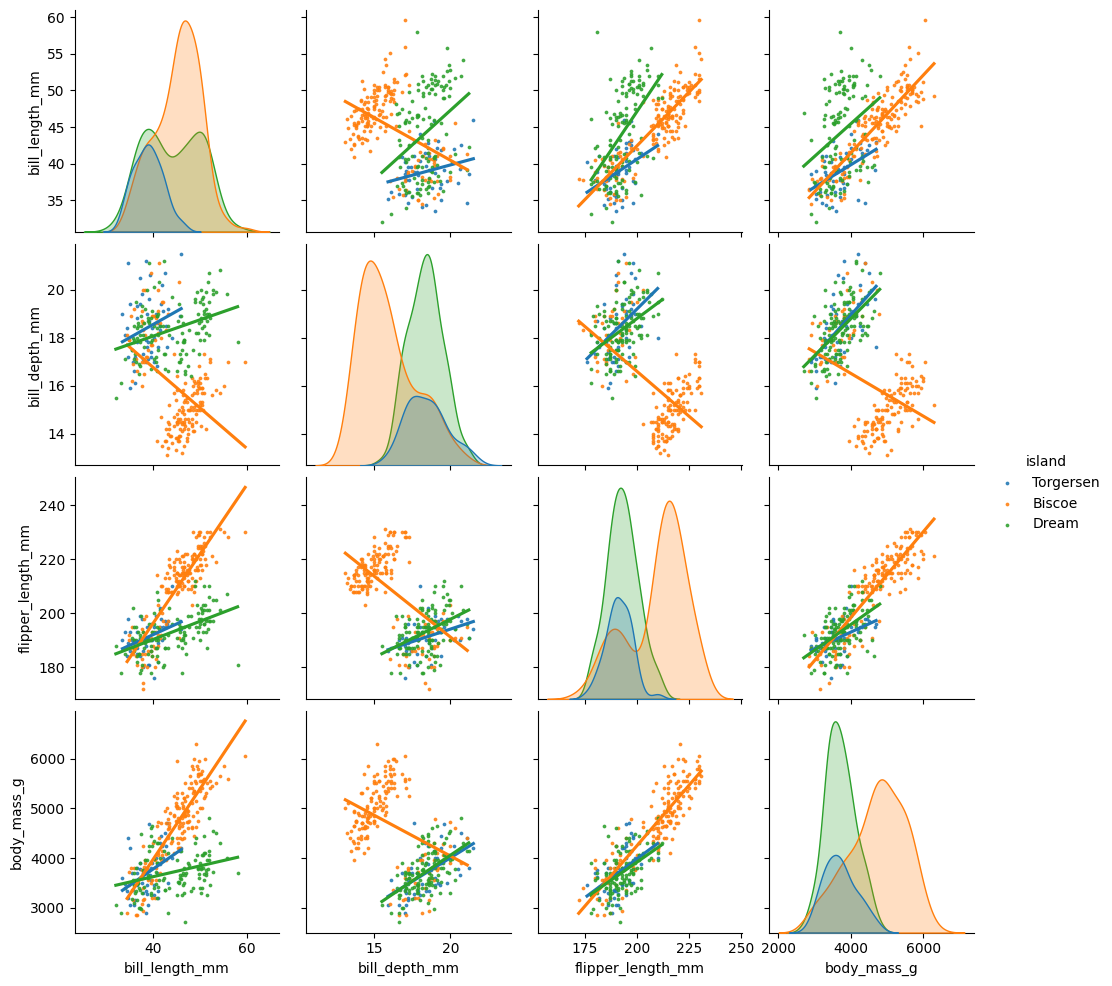

In [46]:
sns.pairplot(penguins, 
             kind='reg',hue = 'island',
             plot_kws={'ci':2, 'scatter_kws': { 's': 3}
                      }, vars= ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
            );

In [48]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

In [49]:
sns.set_style('white')

In [50]:
pen_ex = penguins[penguins.species.isin(['Adelie', 'Chinstrap'])]

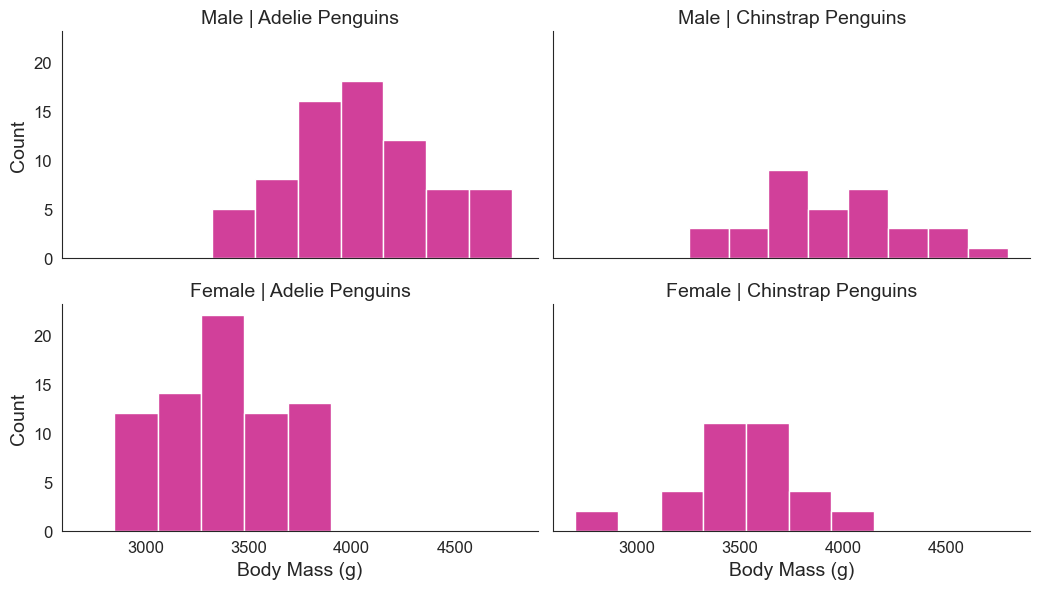

In [54]:
g = sns.FacetGrid(pen_ex, row='sex', col='species', aspect=1.75)
g.map_dataframe(sns.histplot, x='body_mass_g', binwidth=200, color='xkcd:magenta')
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins')
g.set_axis_labels('Body Mass (g)', "Count")

plt.tight_layout()

## Basics

In [10]:
sns.set_style('white')

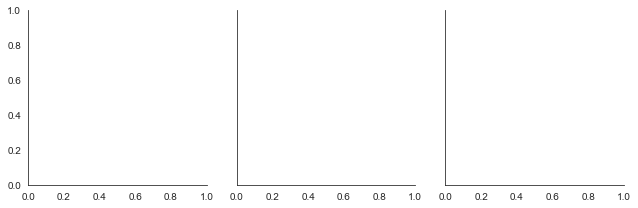

In [11]:
g = sns.FacetGrid(penguins, col='island');

In [12]:
type(g)

seaborn.axisgrid.FacetGrid

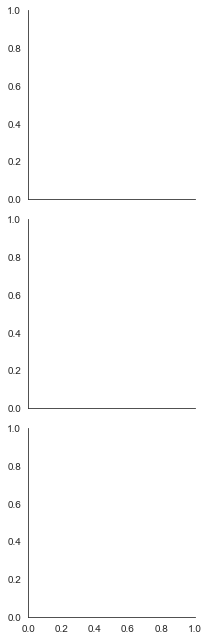

In [13]:
g = sns.FacetGrid(penguins, row='island'); 

### `.map()`

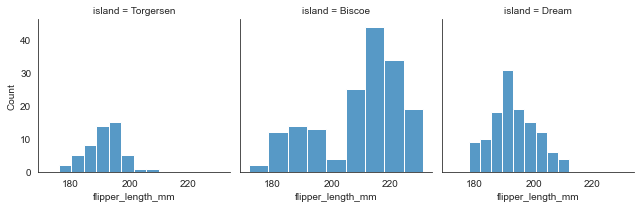

In [14]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, "flipper_length_mm");

### `.map_dataframe()`

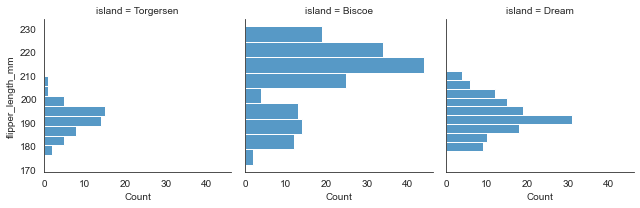

In [15]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm'); 

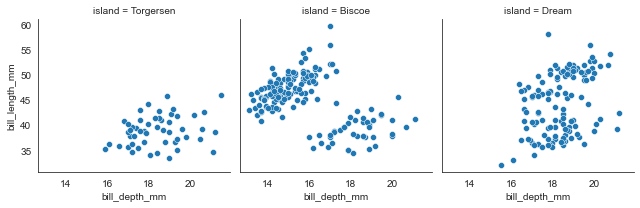

In [18]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_depth_mm', y='bill_length_mm');

## Methods and Attributes

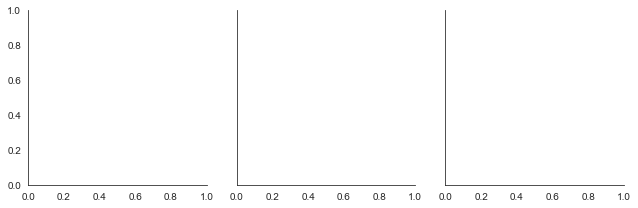

In [17]:
g = sns.FacetGrid(penguins, col='island');

In [18]:
type(g)

seaborn.axisgrid.FacetGrid

In [19]:
#g.  Hit TAB to see properties and methods

### `.set_axis_labels()`

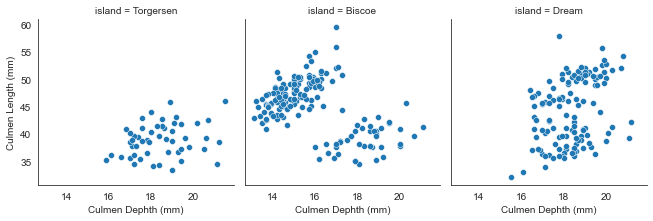

In [20]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Dephth (mm)', 'Culmen Length (mm)');

### `.set_titles()`

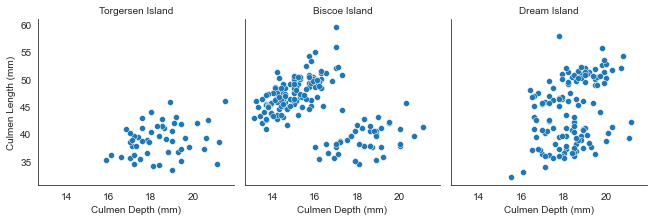

In [21]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

### `sharey, ylim`

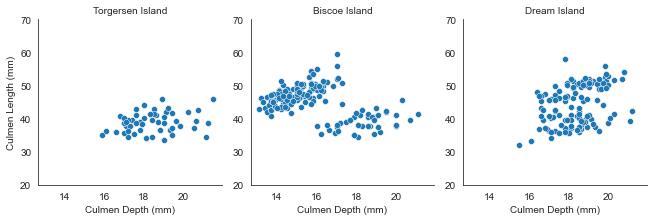

In [23]:
g = sns.FacetGrid(penguins, col='island', sharey=False, ylim=(20, 70))

g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.set_axis_labels('Culmen Depth (mm)', 'Culmen Length (mm)')
g.set_titles(col_template='{col_name} Island');

## Hue and Custom Functions

### `hue`

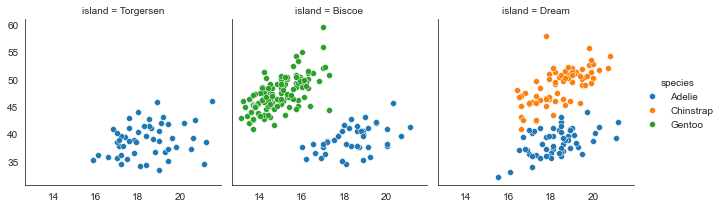

In [24]:
g = sns.FacetGrid(penguins, col='island', hue='species')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm')
g.add_legend();

### `palette`

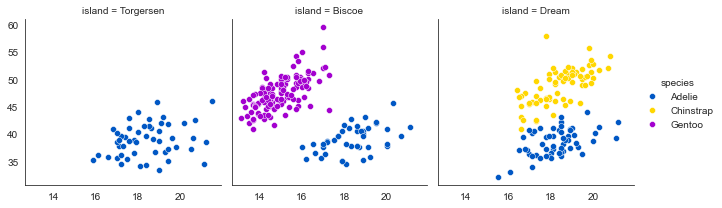

In [25]:
g = sns.FacetGrid(penguins, col='island', hue='species', palette='prism')
g.map_dataframe(sns.scatterplot, x='culmen_depth_mm', y='culmen_length_mm') 
g.add_legend();

#### Display a facetgrid figure by classes so that the corresponding ages are displayed.

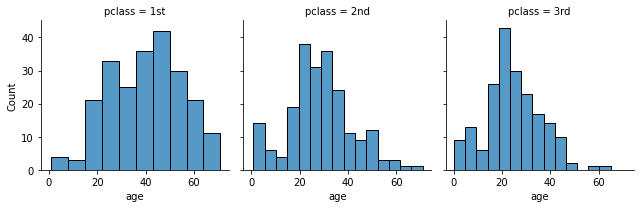

In [17]:
g = sns.FacetGrid(titanic_df, col='pclass')
g.map(sns.histplot, 'age' );
# g.map(sns.graphXXX , 'string of which column of the passengers data frame we are interested in')

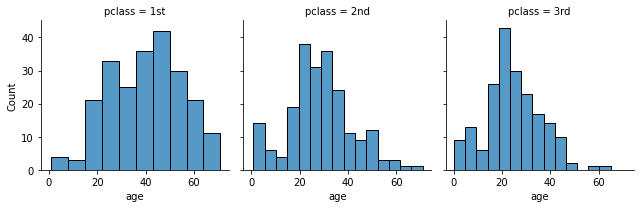

In [18]:
g = sns.FacetGrid(titanic_df, col='pclass')
g.map_dataframe(sns.histplot, x='age' )


### Data from Unit 7, house_df :

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Display a facetgrid figure by 'ocean_proximity' over the distribution of median income and median house value

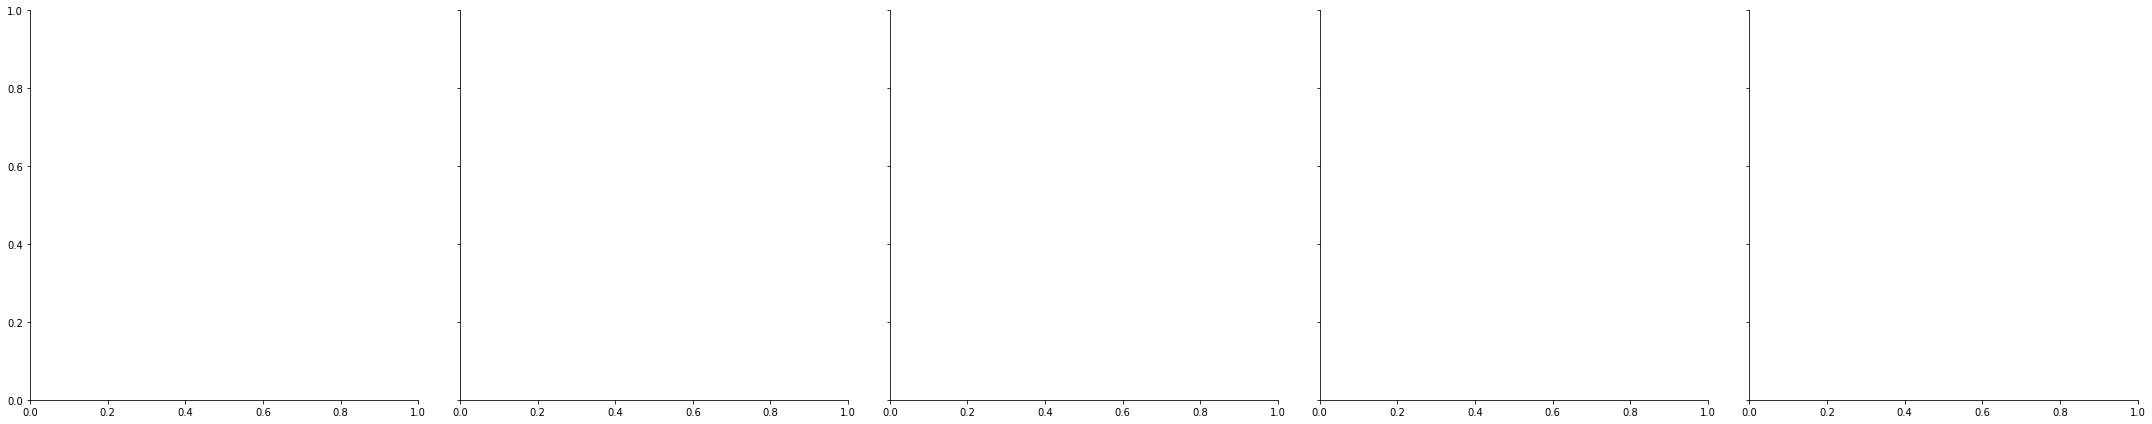

In [8]:
g = sns.FacetGrid(house_df, col='ocean_proximity',col_wrap=5, height=6, hue='ocean_proximity')
g

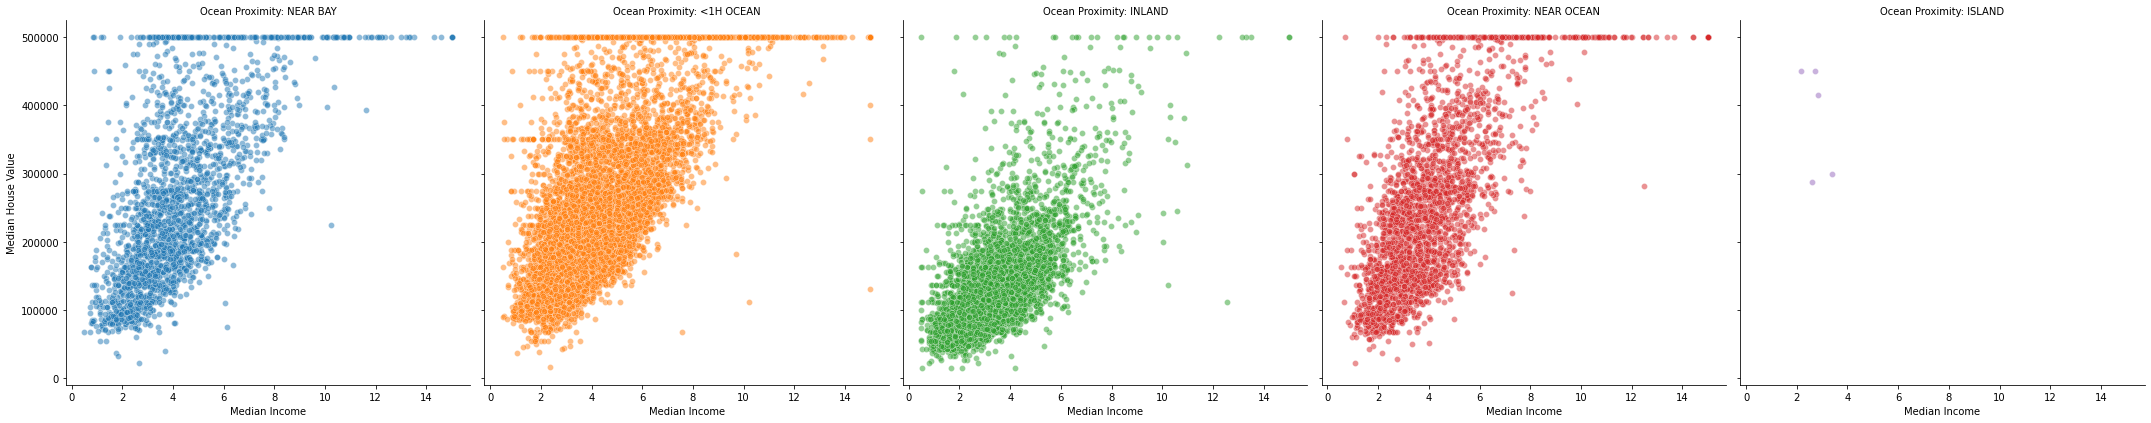

In [11]:
g = sns.FacetGrid(house_df, col='ocean_proximity',col_wrap=5, height=6,hue='ocean_proximity')
g.map_dataframe(sns.scatterplot, x='median_income', y= 'median_house_value' , alpha=0.5,)

# Customize labels and titles
g.set_axis_labels('Median Income', 'Median House Value')
g.set_titles('Ocean Proximity: {col_name}')


---
#### We can distinguish relationships between columns by the `pairplot` function Type `sns.pairplot()` and enter the appropriate parameters

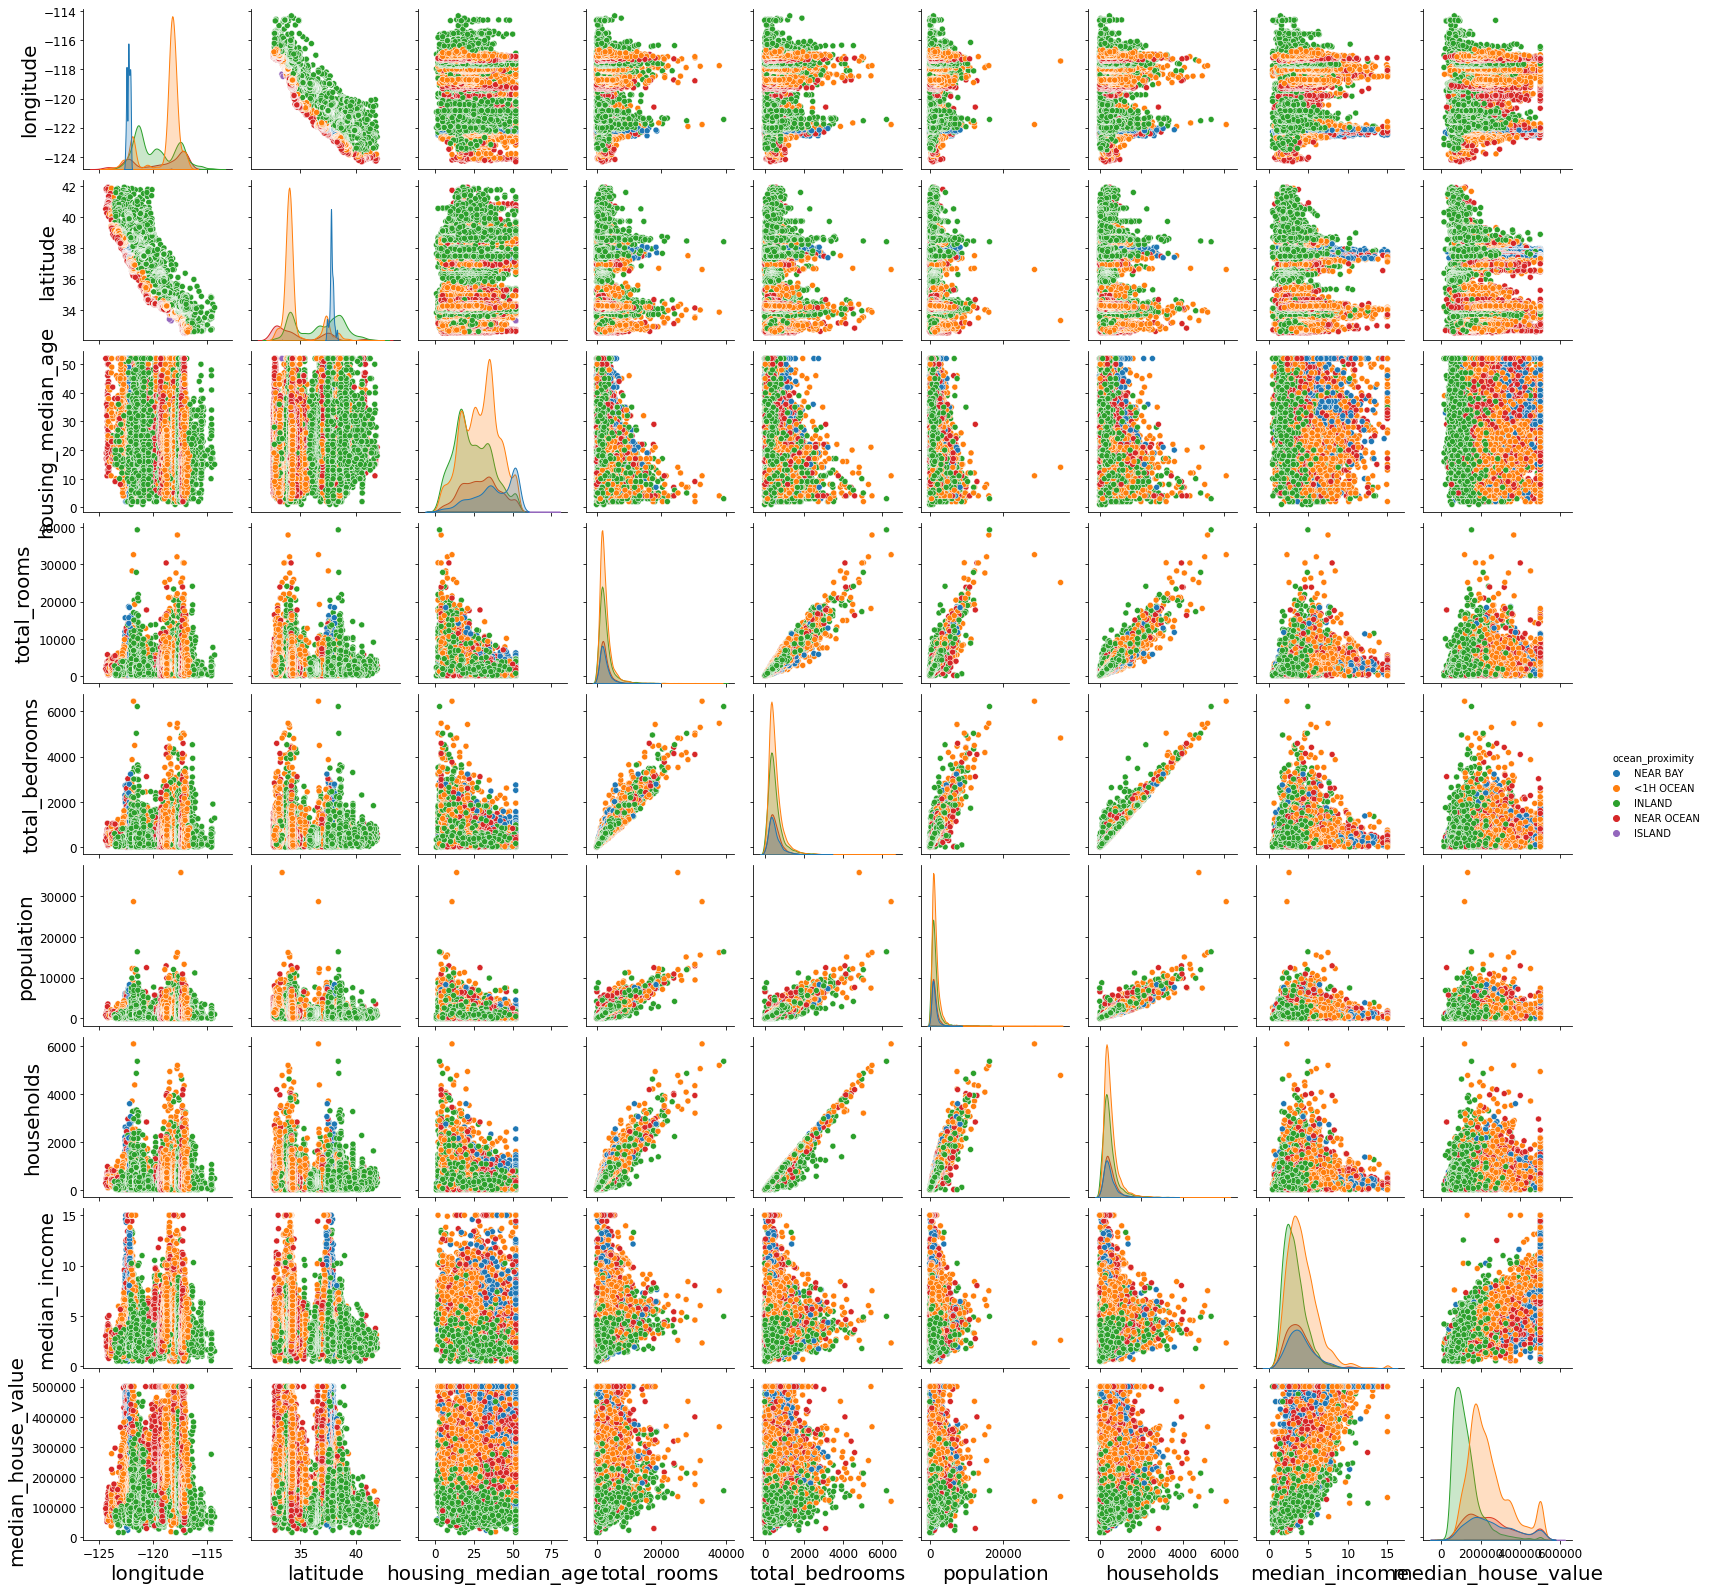

In [78]:
sns.pairplot(house_df, hue='ocean_proximity')
plt.show()

#### As with any function, there are countless options to set our preferences. 
#### Display only the following columns using `pairplot()`
##### 

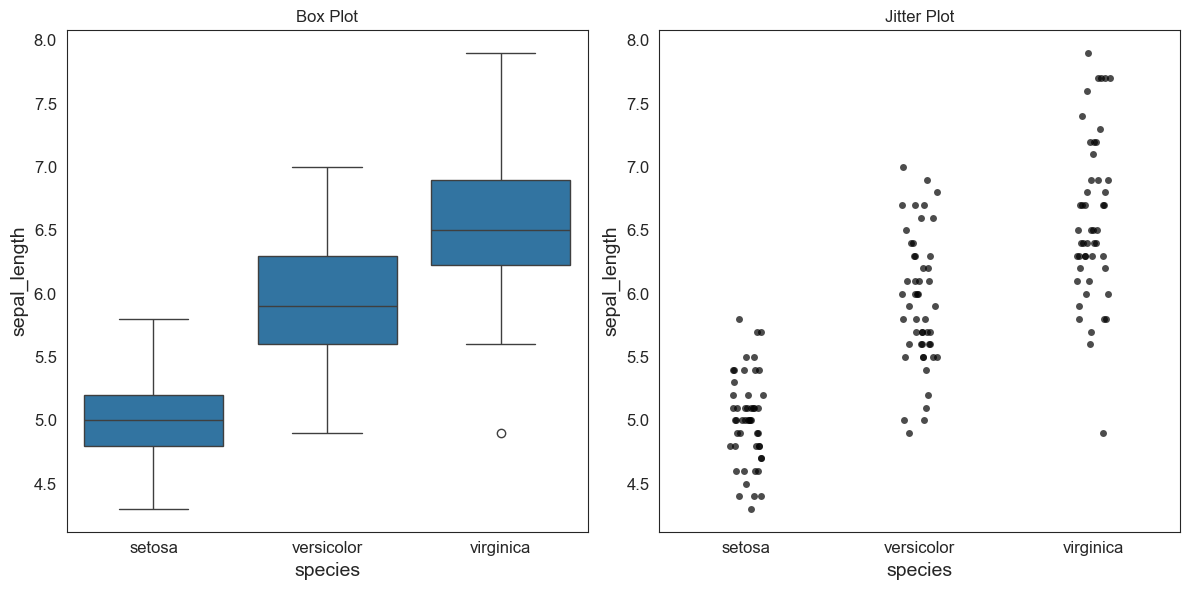

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset("iris")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Box plot
sns.boxplot(x='species', y='sepal_length', data=data, ax=axes[0])
axes[0].set_title("Box Plot")

# Jitter plot (Strip plot)
sns.stripplot(x='species', y='sepal_length', data=data, jitter=True, color='black', alpha=0.7, ax=axes[1])
axes[1].set_title("Jitter Plot")

# Adjust layout
plt.tight_layout()
plt.show()
